<a href="https://colab.research.google.com/github/anuraagbarde/MachineLearning/blob/main/2018BCS010_ML_LAB_asg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Global Init

In [57]:
import numpy as np;
import matplotlib.pyplot as plt;
import math;
from random import randrange

# Global variables
n=20;                 # No. of points for the Dataset
xTrainData=np.zeros(n);       # Independent points 
yTrainData=np.zeros(n);       # Dependent points

# Create Training Dataset

In [58]:
# Normal distribution Noise Generation
noise=np.random.normal(0,0.15,n); #(mean, variance, no. of points)
print(noise)

[-0.02655052 -0.17355446 -0.30135325  0.07103712  0.19320635  0.05682958
 -0.02824376 -0.2470064  -0.02809159 -0.18482543  0.23869137 -0.16392461
  0.01730134 -0.08901218  0.05791699  0.08690789 -0.10232828 -0.17492905
 -0.30060461  0.11185908]


In [59]:
# Generation of Random Dataset as training => y = sin(x) + noise
for i in range(0,n):
    temp=randrange(0,n+1,1)*2*math.pi/n
    xTrainData[i] = temp
    yTrainData[i] = math.sin(temp)+noise[i]

print('Randomly Generated Train Dataset with 20 points')
print('X | Y');
for i in range(0,n):
  print(xTrainData[i] , ' | ' , yTrainData[i]);


Randomly Generated Dataset with 20 points
X | Y
3.455751918948772  |  -0.33556751475600577
4.084070449666731  |  -0.9825714553195423
1.2566370614359172  |  0.6497032662619611
1.2566370614359172  |  1.02209363481896
4.39822971502571  |  -0.757850170440295
6.283185307179586  |  0.05682958268477391
6.283185307179586  |  -0.028243764667518417
5.026548245743669  |  -1.198062916393467
4.71238898038469  |  -1.0280915872531826
0.3141592653589793  |  0.12419156030546724
5.654866776461628  |  -0.34909388024691335
4.71238898038469  |  -1.1639246071203078
2.827433388230814  |  0.3263183380742387
3.455751918948772  |  -0.39802917205514876
1.2566370614359172  |  1.0089735047518256
1.8849555921538759  |  1.0379644106330264
0.3141592653589793  |  0.2066887132245867
5.026548245743669  |  -1.1259855682254751
3.455751918948772  |  -0.6096216059629576
0.6283185307179586  |  0.6996443330072577


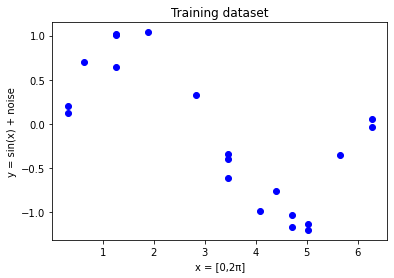

In [60]:
# Plot of Training Dataset
plt.plot(xTrainData,yTrainData,'bo');
plt.xlabel('x = [0,2π]');
plt.ylabel('y = sin(x) + noise');
plt.title('Training dataset');
plt.show()

# Create Testing Dataset

In [61]:
# Generation of Random Dataset as training => y = sin(x)

xTestData=np.zeros(n);       # Independent points 
yTestData=np.zeros(n);       # Dependent points

for i in range(0,n):
    temp=randrange(0,n+1,1)*2*math.pi/n
    xTrainData[i] = temp
    yTrainData[i] = math.sin(temp)

print('Randomly Generated Test Dataset with 20 points')
print('X | Y');
for i in range(0,n):
  print(xTrainData[i] , ' | ' , yTrainData[i]);


Randomly Generated Test Dataset with 20 points
X | Y
2.827433388230814  |  0.3090169943749475
2.199114857512855  |  0.8090169943749475
0.9424777960769379  |  0.8090169943749475
4.71238898038469  |  -1.0
2.5132741228718345  |  0.5877852522924732
3.141592653589793  |  1.2246467991473532e-16
4.084070449666731  |  -0.8090169943749473
2.5132741228718345  |  0.5877852522924732
5.969026041820607  |  -0.3090169943749476
4.084070449666731  |  -0.8090169943749473
0.6283185307179586  |  0.5877852522924731
2.199114857512855  |  0.8090169943749475
0.6283185307179586  |  0.5877852522924731
5.026548245743669  |  -0.9510565162951536
0.9424777960769379  |  0.8090169943749475
1.5707963267948966  |  1.0
3.455751918948772  |  -0.3090169943749469
2.199114857512855  |  0.8090169943749475
2.5132741228718345  |  0.5877852522924732
2.5132741228718345  |  0.5877852522924732
